In [1]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def mse(imageA, imageB):

    error = np.sum((imageA.astype("float") - imageB.astype("float"))**2)
    error  /= float(imageA.shape[0] * imageA.shape[1])
    return error

def compare_images(imageA, imageB, title):

    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)

    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    
    # show the images
    plt.show()

In [3]:
original = cv2.imread("J_P_O.jpg")
contrast = cv2.imread("J_P_C.jpg")
photo_shopped = cv2.imread("J_P_P.jpg")

# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
print("Original Shape: ",original.shape)
original = cv2.resize(original, (1050, 1610)) 
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
print("Contast Shape: ",contrast.shape)
contrast = cv2.resize(contrast, (1050, 1610)) 
photo_shopped = cv2.cvtColor(photo_shopped, cv2.COLOR_BGR2GRAY)
print("Photo_Shopped Shape: ",photo_shopped.shape)
photo_shopped = cv2.resize(photo_shopped, (1050, 1610)) 

Original Shape:  (338, 341)
Contast Shape:  (343, 339)
Photo_Shopped Shape:  (335, 338)


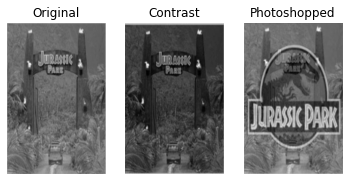

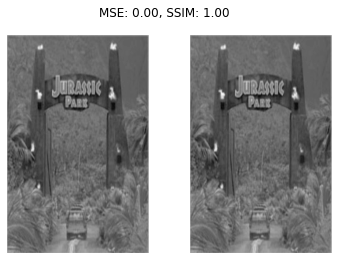

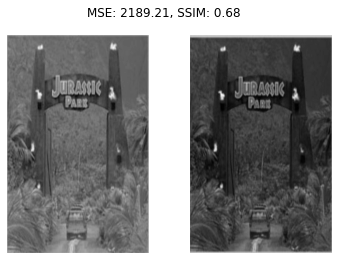

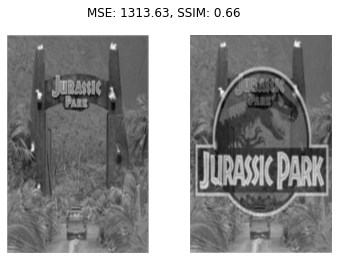

In [4]:
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast), ("Photoshopped", photo_shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, contrast, "Original vs. Contrast")
compare_images(original, photo_shopped, "Original vs. Photoshopped")